In [11]:
 import tensorflow_datasets as tfds
[test_set_raw, valid_set_raw, train_set_raw], info = tfds.load("tf_flowers",
split=["train[:10%]", "train[10%:25%]", "train[25%:]"], as_supervised=True,
with_info=True)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='~/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [13]:
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
dataset_size = info.splits["train"].num_examples

2022-06-09 15:51:03.473104: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-09 15:51:03.563862: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


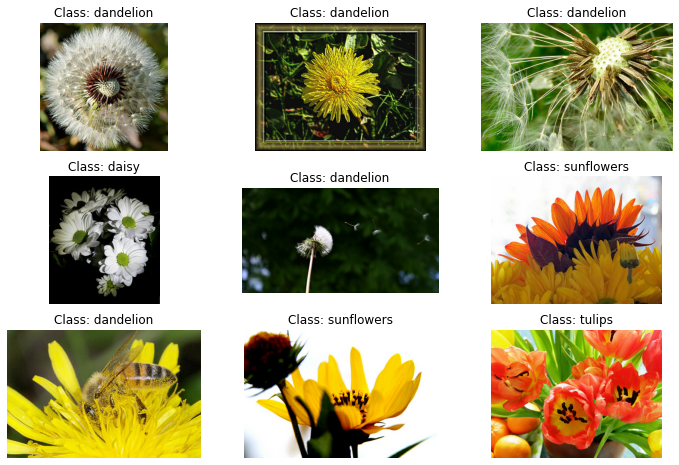

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
index = 0
sample_images = train_set_raw.take(9)
for image, label in sample_images:
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")
plt.show(block=False)

In [15]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224]) 
    return resized_image, label

In [16]:
import tensorflow as tf
batch_size = 32
train_set = train_set_raw.map(preprocess).shuffle(dataset_size).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1) 
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [17]:
import numpy as np
np.array(train_set)
train_set.tensor_sh

AttributeError: 'PrefetchDataset' object has no attribute 'tensor_sh'

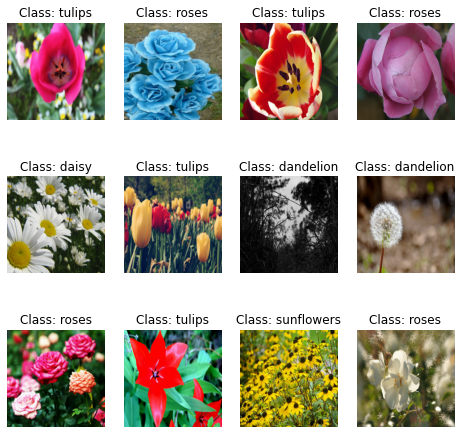

In [18]:
plt.figure(figsize=(8, 8))
sample_batch = train_set.take(1)
for X_batch, y_batch in sample_batch:
    for index in range(12):
        plt.subplot(3, 4, index + 1)
        plt.imshow(X_batch[index]/255.0)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")
plt.show()

In [19]:
from tensorflow import keras
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, 
kernel_size=3, activation = 'relu', padding="SAME")

In [20]:
model = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(5)
])
        


In [21]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_set,
  validation_data=valid_set,
  epochs=epochs
)

Epoch 1/10


2022-06-09 15:51:11.374194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - ETA: 0s - loss: 1.3632 - accuracy: 0.4128

2022-06-09 15:51:20.613144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 10s 108ms/step - loss: 1.3632 - accuracy: 0.4128 - val_loss: 1.1133 - val_accuracy: 0.5499
Epoch 2/10
86/86 [==============================] - 9s 106ms/step - loss: 1.0005 - accuracy: 0.6003 - val_loss: 0.9855 - val_accuracy: 0.5862
Epoch 3/10
86/86 [==============================] - 9s 106ms/step - loss: 0.8213 - accuracy: 0.6937 - val_loss: 0.9271 - val_accuracy: 0.6316
Epoch 4/10
86/86 [==============================] - 9s 107ms/step - loss: 0.5927 - accuracy: 0.7787 - val_loss: 1.0343 - val_accuracy: 0.6025
Epoch 5/10
86/86 [==============================] - 9s 107ms/step - loss: 0.3364 - accuracy: 0.8863 - val_loss: 1.0706 - val_accuracy: 0.6715
Epoch 6/10
86/86 [==============================] - 9s 107ms/step - loss: 0.1564 - accuracy: 0.9553 - val_loss: 1.3904 - val_accuracy: 0.6497
Epoch 7/10
86/86 [==============================] - 9s 107ms/step - loss: 0.0947 - accuracy: 0.9724 - val_loss: 1.5427 - val_accuracy: 0.6479
Epoch 8/10
86/86

In [22]:
history.model.evaluate(test_set)

12/12 [==============================] - 1s 42ms/step - loss: 1.6934 - accuracy: 0.7030


[1.6934146881103516, 0.7029972672462463]